# Lab 5

**This lab must be completed individually.**

Where provided, try your best to match the **Sample Output** as best as you can.

In [1]:
# Before moving forward, let's import these libaries first.
import pandas as pd
import numpy as np

## A. Plotting using Seaborn (and matplotlib) (Total: 2 marks)

`matplotlib` is a Python library for data visualization. 
`seaborn` is a statistical data visualization library layer that provides a high-level interface for drawing statistical graphics and some convenient functions for plotting data frames.

You may need to install `seaborn` and `matplotlib`

`conda install seaborn`<br>
`conda install matplotlib`

and just in case it's not the latest version, go ahead and update it:

`conda update matplotlib`<br>
`conda update seaborn`



### A1: Set the Seaborn figure theme and scale up the text in the figures (2 marks)

There are five preset Seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. 
They are each suited to different applications and personal preferences.
You can see what they look like [here](https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles).

Hint: You will need to use the `font_scale` property of the `set_theme()` function in Seaborn.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = 'whitegrid', font_scale = 1)


## B: Exploratory Data Analysis (34 marks)

For following part of the lab, we're going to use a dataset from [Kaggle.](https://www.kaggle.com/agirlcoding/all-space-missions-from-1957)

### B1. Describe the dataset (2 marks) 

Consider the following questions to guide you in your exploration:

- Who: Which company/agency/organization provided this data?
- What: What is in your data?
- When: When was your data collected (for example, for which years)?
- Why: What is the purpose of your dataset? Is it for transparency/accountability, public interest, fun, learning, etc...
- How: How was your data collected? Was it a human collecting the data? Historical records digitized? Server logs?


This data set is provided by the launches from Next SpaceFlight (https://nextspaceflight.com/launches/past/?page=1) but is maintained by Agirlcoding. The dataset contains data from various space missions from October 3rd, 1957 to August 13th, 2020. The data includes the company name, location, status rocket, date and time of the launch, details of the rocket, rocket number, and the status of the mission. The purpose of this dataset is mainly for fun and public interest but this exploration was specifically made to find and provide information on all space missions from 1957 to 2020, regardless of whether or not the launch was a success or failure. This data was collected by human in hopes of creating further data visualizations. 


### B2. Load data (1 mark)

Without downloading the csv file to your repo, load the "*Space_Cleaned.csv*" file using the direct URL from [this link](https://gist.githubusercontent.com/lintonylin/4f9ba13dc37b7510ea392d95c494f891/raw/1092dba2c54ed10d03f2999d8ad7878757b39a8f/Space_Cleaned.csv)

**DO NOT DOWNLOAD THE DATA TO YOUR REPOSITORY! ** 
Open the link, copy it and pass it to `read_csv()`.

Use `pandas` module/package and the `read_csv()` function to load the data by passing in the URL and then save the data in a variable called `df`.

In [3]:
df = pd.read_csv("https://gist.githubusercontent.com/lintonylin/4f9ba13dc37b7510ea392d95c494f891/raw/1092dba2c54ed10d03f2999d8ad7878757b39a8f/Space_Cleaned.csv")
df

,id,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Year
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success,United States of America,2020
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,United States of America,2020
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success,Kazakhstan,2020
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success,United States of America,2020
...,...,...,...,...,...,...,...,...,...,...
4279,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,United States of America,1958
4280,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,United States of America,1958
4281,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,United States of America,1957
4282,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,1957


### B3. Explore your dataset (3 marks)

Which of your columns are interesting/relevant? Remember to take some notes on your observations, you'll need them for the next EDA step (initial thoughts).

#### B3.1:  You should start with [`df.describe().T`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) (2 marks)

See [linked documentation]((https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) for the use of `include`/`exclude` to look at numerical and categorical data.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4284.0,2173.017974,1248.313326,0.0,1102.75,2181.5,3252.25,4323.0
Year,4284.0,1987.215920,18.064993,1957.0,1972.00,1984.0,2002.00,2020.0


In [5]:
df[['Company Name', 'Location', 'Status Mission', 'Status Rocket','Country', 'Year']]

,Company Name,Location,Status Mission,Status Rocket,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Success,StatusActive,United States of America,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Success,StatusActive,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Success,StatusActive,United States of America,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Success,StatusActive,Kazakhstan,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Success,StatusActive,United States of America,2020
...,...,...,...,...,...,...
4279,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Failure,StatusRetired,United States of America,1958
4280,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Success,StatusRetired,United States of America,1958
4281,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Failure,StatusRetired,United States of America,1957
4282,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Success,StatusRetired,Kazakhstan,1957


#### B3.2 Let's try `pandas_profiling` now. (1 mark)

**Hint: To install the [`pandas_profiling`](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3) package, you'll need to use `conda`:**

- `conda install -c conda-forge pandas-profiling`

In [6]:
import pandas_profiling as pdp

from pandas_profiling import ProfileReport

prof = ProfileReport(df)
prof.to_file(output_file='output.html')
df.profile_report()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### B4. Initial Thoughts (2 marks)

#### B4.1. Use this section to record your observations. (2 marks)

Does anything jump out at you as surprising or particularly interesting? 

Where do you think you'll go with exploring this dataset? Feel free to take notes in this section and use it as a scratch pad.

Any content in this area will only be marked for effort and completeness.

#### # Your observations here:

- In comparison to the successful missions, there are not as many failed missions as I thought there would be. 
- The Russians heavily dominated the space game from 1957 to 2020 
- There is not a lot of collected information about the rocket itself, which is evident in the missing info column 
- I think a possible exploration idea could be to analyze the correlation between the country that launched the rocket and their level of success. 

### B5. Wrangling (10 marks)

The next step is to wrangle your data based on your initial explorations. Normally, by this point, you have some idea of what your research question will be, and that will help you narrow and focus your dataset. 

In this lab, we will guide you through some wrangling tasks with this dataset.

#### B5.1 Change name of the column Rocket to Mission Cost and save it. (The name of the column rocket has one space before it (use ' Rocket'))(1 mark)

In [7]:
df=df.rename(columns={' Rocket':' Mission Cost'})
df

,id,Company Name,Location,Datum,Detail,Status Rocket,Mission Cost,Status Mission,Country,Year
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success,United States of America,2020
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,United States of America,2020
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success,Kazakhstan,2020
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success,United States of America,2020
...,...,...,...,...,...,...,...,...,...,...
4279,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,United States of America,1958
4280,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,United States of America,1958
4281,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,United States of America,1957
4282,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,1957


#### B5.2 Drop any NULL values if there is any. (Keep in mind whether you decide to save the dataset with no null or not will effect your future plots) (1 mark)

In [8]:
df = df.dropna()
df

,id,Company Name,Location,Datum,Detail,Status Rocket,Mission Cost,Status Mission,Country,Year
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success,United States of America,2020
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success,Kazakhstan,2020
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success,United States of America,2020
5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,2020
...,...,...,...,...,...,...,...,...,...,...
3815,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59,Success,United States of America,1966
3931,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,United States of America,1965
3953,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,United States of America,1965
3960,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,United States of America,1964


#### B5.3 Reset the index to get a new index without missing values (1 mark)

In [28]:
df=df.reset_index()
df

,index,id,Company Name,Location,Datum,Detail,Status Rocket,Mission Cost,Status Mission,Country,Year
0,154,212,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Tue Sep 25, 2018 22:38 UTC",Ariane 5 ECA | Horizons-3e & Azerspace 2/Intel...,StatusActive,200,Success,France,2018
1,150,205,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Sat Oct 20, 2018 01:45 UTC",Ariane 5 ECA | BepiColombo,StatusActive,200,Success,France,2018
2,351,485,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Wed Sep 30, 2015 20:30 UTC","Ariane 5 ECA | NBN Co 1A, ARSAT-2",StatusActive,200,Success,France,2015
3,159,221,Arianespace,"ELV-1 (SLV), Guiana Space Centre, French Guian...","Wed Aug 22, 2018 21:20 UTC",Vega | ADM-Aeolus,StatusActive,37,Success,France,2018
4,598,841,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Wed Nov 14, 2007 22:03 UTC",Ariane 5 ECA | Skynet 5B & Star One C1,StatusActive,200,Success,France,2007
...,...,...,...,...,...,...,...,...,...,...,...
958,672,979,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Mon Nov 08, 2004 18:29 UTC",Soyuz 2.1a | Demo Flight,StatusActive,48.5,Success,Russian Federation,2004
959,316,435,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Sat Jun 04, 2016 14:00 UTC",Rokot/Briz KM | Cosmos 2517,StatusRetired,41.8,Success,Russian Federation,2016
960,144,198,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Sat Nov 03, 2018 20:17 UTC",Soyuz 2.1b/Fregat | GLONASS-M No.54S,StatusActive,48.5,Success,Russian Federation,2018
961,657,948,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Fri Aug 26, 2005 18:34 UTC",Rokot/Briz KM | Monitor-E,StatusRetired,41.8,Success,Russian Federation,2005


#### B5.4. A new column was added called `index`; remove it. (1 mark)

In [29]:
df=df.drop(columns=['index'])
df

,id,Company Name,Location,Datum,Detail,Status Rocket,Mission Cost,Status Mission,Country,Year
0,212,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Tue Sep 25, 2018 22:38 UTC",Ariane 5 ECA | Horizons-3e & Azerspace 2/Intel...,StatusActive,200,Success,France,2018
1,205,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Sat Oct 20, 2018 01:45 UTC",Ariane 5 ECA | BepiColombo,StatusActive,200,Success,France,2018
2,485,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Wed Sep 30, 2015 20:30 UTC","Ariane 5 ECA | NBN Co 1A, ARSAT-2",StatusActive,200,Success,France,2015
3,221,Arianespace,"ELV-1 (SLV), Guiana Space Centre, French Guian...","Wed Aug 22, 2018 21:20 UTC",Vega | ADM-Aeolus,StatusActive,37,Success,France,2018
4,841,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Wed Nov 14, 2007 22:03 UTC",Ariane 5 ECA | Skynet 5B & Star One C1,StatusActive,200,Success,France,2007
...,...,...,...,...,...,...,...,...,...,...
958,979,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Mon Nov 08, 2004 18:29 UTC",Soyuz 2.1a | Demo Flight,StatusActive,48.5,Success,Russian Federation,2004
959,435,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Sat Jun 04, 2016 14:00 UTC",Rokot/Briz KM | Cosmos 2517,StatusRetired,41.8,Success,Russian Federation,2016
960,198,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Sat Nov 03, 2018 20:17 UTC",Soyuz 2.1b/Fregat | GLONASS-M No.54S,StatusActive,48.5,Success,Russian Federation,2018
961,948,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Fri Aug 26, 2005 18:34 UTC",Rokot/Briz KM | Monitor-E,StatusRetired,41.8,Success,Russian Federation,2005


#### B5.5 Sort the dataframe by column Company Name. (1 mark)

In [89]:
df.sort_values(by=['Company Name'])
df

,id,Company Name,Location,Datum,Detail,Status Rocket,Mission Cost,Status Mission,Country,Year
0,212,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2018-09-25,Ariane 5 ECA | Horizons-3e & Azerspace 2/Intel...,StatusActive,200,Success,France,2018
47,626,Arianespace,"ELS, Guiana Space Centre, French Guiana, France",2012-12-02,Soyuz ST-A/Fregat | Pl??iades 1B,StatusActive,80,Success,France,2012
1,205,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2018-10-20,Ariane 5 ECA | BepiColombo,StatusActive,200,Success,France,2018
3,221,Arianespace,"ELV-1 (SLV), Guiana Space Centre, French Guian...",2018-08-22,Vega | ADM-Aeolus,StatusActive,37,Success,France,2018
4,841,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2007-11-14,Ariane 5 ECA | Skynet 5B & Star One C1,StatusActive,200,Success,France,2007
...,...,...,...,...,...,...,...,...,...,...
946,437,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",2016-05-29,Soyuz 2.1b/Fregat | GLONASS-M No.51S,StatusActive,48.5,Success,Russian Federation,2016
959,435,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia",2016-06-04,Rokot/Briz KM | Cosmos 2517,StatusRetired,41.8,Success,Russian Federation,2016
960,198,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",2018-11-03,Soyuz 2.1b/Fregat | GLONASS-M No.54S,StatusActive,48.5,Success,Russian Federation,2018
958,979,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",2004-11-08,Soyuz 2.1a | Demo Flight,StatusActive,48.5,Success,Russian Federation,2004


#### B5.6 Add a new column to the dataframe to convert the "Datum" column to a datetime object (2 marks)


To do this, first we need to add a new column to our dataset to turn the column "Datum" into a proper datetime object so we can do operations on it.

*Hint: Use to [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) function to help you first convert it into a datetime object, and then remove the timezone information and HH:MM:SS using [`.dt.date`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.date.html).*

In [47]:
df['Datum'] = pd.to_datetime(df['Datum'],utc=True).dt.date
df

,id,Company Name,Location,Datum,Detail,Status Rocket,Mission Cost,Status Mission,Country,Year
0,212,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2018-09-25,Ariane 5 ECA | Horizons-3e & Azerspace 2/Intel...,StatusActive,200,Success,France,2018
47,626,Arianespace,"ELS, Guiana Space Centre, French Guiana, France",2012-12-02,Soyuz ST-A/Fregat | Pl??iades 1B,StatusActive,80,Success,France,2012
1,205,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2018-10-20,Ariane 5 ECA | BepiColombo,StatusActive,200,Success,France,2018
3,221,Arianespace,"ELV-1 (SLV), Guiana Space Centre, French Guian...",2018-08-22,Vega | ADM-Aeolus,StatusActive,37,Success,France,2018
4,841,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2007-11-14,Ariane 5 ECA | Skynet 5B & Star One C1,StatusActive,200,Success,France,2007
...,...,...,...,...,...,...,...,...,...,...
946,437,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",2016-05-29,Soyuz 2.1b/Fregat | GLONASS-M No.51S,StatusActive,48.5,Success,Russian Federation,2016
959,435,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia",2016-06-04,Rokot/Briz KM | Cosmos 2517,StatusRetired,41.8,Success,Russian Federation,2016
960,198,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",2018-11-03,Soyuz 2.1b/Fregat | GLONASS-M No.54S,StatusActive,48.5,Success,Russian Federation,2018
958,979,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",2004-11-08,Soyuz 2.1a | Demo Flight,StatusActive,48.5,Success,Russian Federation,2004


#### B5.7. Find the earliest and the latest reported launch in the dataset. (3 mark)

You should use the pandas .min() and .max() functions here, now that your date string is converted to a DateTime object.

##### Sample Output

> The first launch in the dataset happended : 1957-10-04.<br>
> The last launch in the dataset happended : 2020-08-07.<br>

In [103]:
min = str(df.min(axis=0))

max= str(df.max(axis=0))

#not too sure what i am doing, this is as far as i could get haha

print("The first launch in the dataset happened: " + min)
print("The last launch in the dataset happened: " + max)

The first launch in the dataset happened: id                                                                0
Company Name                                            Arianespace
Location          Cosmic Girl, Mojave Air and Space Port, Califo...
Datum                                                    1964-09-01
Detail                                  Antares 110 | Antares A-ONE
Status Rocket                                          StatusActive
 Mission Cost                                              1,160.00
Status Mission                                              Failure
Country                                                       China
Year                                                           1964
dtype: object
The last launch in the dataset happened: id                                                  4020
Company Name                                Virgin Orbit
Location          Xichang Satellite Launch Center, China
Datum                                         2020-0

### B6. Research questions (2 marks)

#### B6.1 Come up with at least two research questions about the dataset that will require data visualizations to help answer. (2 marks)

Recall that for this purpose, you should only aim for "Descriptive" or "Exploratory" research questions.

**Hint: You are welcome to calculate any columns that you think might be useful to answer the question (or re-add dropped columns.***


#### # Your solution here: 

**1. Sample Research Question:** Which Company has the most mission cost?

**2. RQ 1:** How many successful missions were NOT by the Russians?

**3. RQ 2:** To what extent does the location of the mission affect its mission status? 



### B7. Data Analysis and Visualizations (10 marks)

#### B7.1. Counts of mission status (2 marks)
Using [`sns.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot), plot the number of space launches by their status. 

Set the title to be "Status Mission of space launches". 

*Hint: The documentation above contains some examples that might help you get started*
#### Sample output
<img src="./images/bar1.png" width="400px" />

Text(0.5, 1.0, 'Status Mission of Space Launches')

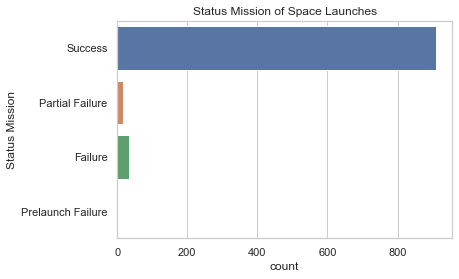

In [12]:
sns.countplot(y="Status Mission", data=df).set_title("Status Mission of Space Launches")

#### B7.2. Counts of launches by country (2 marks)

Plot the counts of launches by country, and order the y-axis by increasing the number of launches (use the `order` parameter of the `countplot()` function).

<img src="./images/bar2.png" width="700px">

<AxesSubplot:xlabel='count', ylabel='Country'>

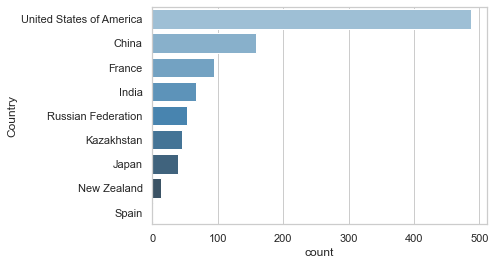

In [77]:
sns.countplot(y="Country", data=df, palette="Blues_d",order=(df['Country'].value_counts().index))

#### B7.3 Status of mission for the top 5 companies (3 marks)

Plot the counts of launches by mission status and country, and order the y-axis by increasing the number of launches 

*Hint: More information and examples can be find in [link](https://www.geeksforgeeks.org/matplotlib-axes-axes-barh-in-python/)*

*Hint: Your plot doesn't have to look exactly like this, but please do explore the [possible color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html). You can specify the colour palette by passing in the keyword like this: `palette='colorblind'`.*

#### Sample output
<img src="./images/bar3.png" width="600px" />

Text(0.5, 1.0, 'Launches by Countries Split by Mission status')

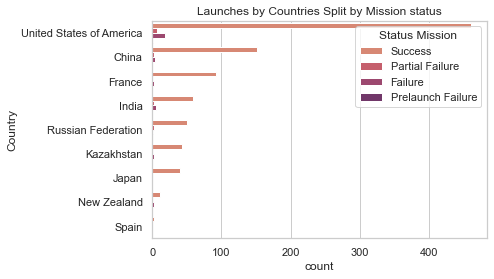

In [44]:
#the question stated mission status and country but the sample output shows company name, so I used country for my code:
sns.countplot(y='Country', hue = 'Status Mission', data=df, order=(df['Country'].value_counts().index), palette = "flare").set_title("Launches by Countries Split by Mission status")

#### B7.4. Plot the launche counts plotted over time by mission status (3 mark)

Using `sns.displot`, plot the histogram of launches over time.

*Hint 1: [Here is a nice tutorial](https://seaborn.pydata.org/tutorial/distributions.html) of all the different options that are possible when creating a histogram.*

#### Sample output
<img src="./images/bar4.png" width="800px">

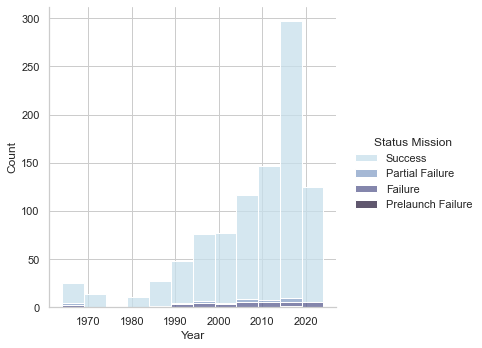

In [80]:
sns.displot(x='Year', hue='Status Mission', data=df, multiple='stack', palette = "ch:s=.25,rot=-.25", binwidth=5)


#### B7.5. BONUS - For a bonus mark, move the legend to the top left of the plot (1 mark)

AttributeError: 'FacetGrid' object has no attribute 'legend_loc'

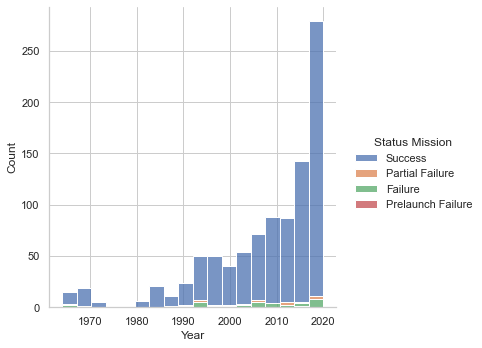

In [46]:
sns.displot(x='Year', hue='Status Mission', data=df, multiple='stack').legend_loc('upper_left')


#### B7.6. BONUS - For a bonus mark, plot a similar graph like D7 that compares top 5 counties in terms of number of launches(1 mark)



Text(0.5, 1.0, 'Launches by Countries Split by Mission status')

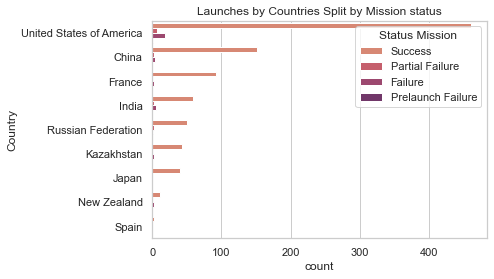

In [104]:
#the question stated mission status and country but the sample output shows company name, so I used country for my code:
sns.countplot(y='Country', hue = 'Status Mission', data=df, order=(df['Country'].value_counts().index), palette = "flare").set_title("Launches by Countries Split by Mission status")

### B8. Summary and conclusions (4 marks)

#### B8.1. Summarize your findings and describe any conclusions and insight you were able to draw from your visualizations. (3 marks)

- **How many successful missions were NOT by the Russians?**

    - When analyzing the graph from B7.3, it is evident that most of the successful missions have actually been completed by the United States
    - In fact, the United States had more than 400 successful missions from the years 1957 to 2020
    - Although it initially looked like the Russians dominated the space game, they are actually at the lower part of the spectrum when comparing the other countries and their launches over the years. 
    

- **To what extent does the location of the mission affect its mission status?**

    - Similarily to the first research question, the graph from question B7.3 evidentally shows the possible correlation between the location of the mission and its corresponding mission status
    - Taking that into account, there actually isn't too much correlation between the two variables and the reason behind this is because almost all of the data that was collected was for a successful mission. There is very limited data for a failed mission. 
    - Therefore, the extent to which the location affects the mission status is minimal or even nonexistent.
  

## C. Method Chaining (6 marks)

Method chaining allows you to apply multiple processing steps to your dataframe in a fewer lines of code so it is more readable. You should avoid having too many methods in your chain, as the more you have in a single chain, the harder it is to debug or troubleshoot. I would target about 5 methods in a chain, though this is a flexible suggestion and you should do what makes your analysis the most readable and group your chains based on their purpose (e.g., loading/cleaning, processing, etc…).

#### C1. Use Method Chaining on the commands from sections B5.1, B5.2, B5.3, B5.4, B5.5, B5.6 (6 marks)

In [90]:
df

#i have read through all of the modules that i thought would help me with this lab and i still do not have the knowledge to do method chaining. Sorry, i tried though 


def rename():
    df=df.rename(columns={' Rocket':' Mission Cost'})
    
def drop():
    df=df.dropna()

def fix():
     df=df.reset_index()
    
def remove():
  df=df.drop(columns=['index'])
    
def sort():
    df.sort_values(by=['Company Name'], inplace=True)
    
def datefix():
    df['Datum'] = pd.to_datetime(df['Datum'],utc=True).dt.date
    


,id,Company Name,Location,Datum,Detail,Status Rocket,Mission Cost,Status Mission,Country,Year
0,212,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2018-09-25,Ariane 5 ECA | Horizons-3e & Azerspace 2/Intel...,StatusActive,200,Success,France,2018
47,626,Arianespace,"ELS, Guiana Space Centre, French Guiana, France",2012-12-02,Soyuz ST-A/Fregat | Pl??iades 1B,StatusActive,80,Success,France,2012
1,205,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2018-10-20,Ariane 5 ECA | BepiColombo,StatusActive,200,Success,France,2018
3,221,Arianespace,"ELV-1 (SLV), Guiana Space Centre, French Guian...",2018-08-22,Vega | ADM-Aeolus,StatusActive,37,Success,France,2018
4,841,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2007-11-14,Ariane 5 ECA | Skynet 5B & Star One C1,StatusActive,200,Success,France,2007
...,...,...,...,...,...,...,...,...,...,...
946,437,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",2016-05-29,Soyuz 2.1b/Fregat | GLONASS-M No.51S,StatusActive,48.5,Success,Russian Federation,2016
959,435,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia",2016-06-04,Rokot/Briz KM | Cosmos 2517,StatusRetired,41.8,Success,Russian Federation,2016
960,198,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",2018-11-03,Soyuz 2.1b/Fregat | GLONASS-M No.54S,StatusActive,48.5,Success,Russian Federation,2018
958,979,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia",2004-11-08,Soyuz 2.1a | Demo Flight,StatusActive,48.5,Success,Russian Federation,2004
